# Loading libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
!pip install graphviz

# Decision trees

### Loading a dataset for regression

Here we will use the Boston housing dataset which comes with sklearn. The objective is to predict the house prices.

In [22]:
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


## Data splitting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [24]:
model = DecisionTreeRegressor(max_depth=3)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

In [25]:
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

,Error_metric,Train,Test
0,Mean error,0.00,-0.54
1,Mean absolute error,2.91,3.42
2,Mean squared error,15.81,27.11
3,Root mean squared error,3.98,5.21
4,Mean absolute percentual error,15.37,18.46
5,R2,0.81,0.70


In [27]:
y_train.max()

50.0

In [29]:
y_train.min()

5.0

In [30]:
y_test.max()

50.0

In [31]:
y_test.min()

5.6

In [32]:
X_test.shape

(152, 13)

In [16]:
X_train.shape

(354, 13)

## Visualizing the decission tree

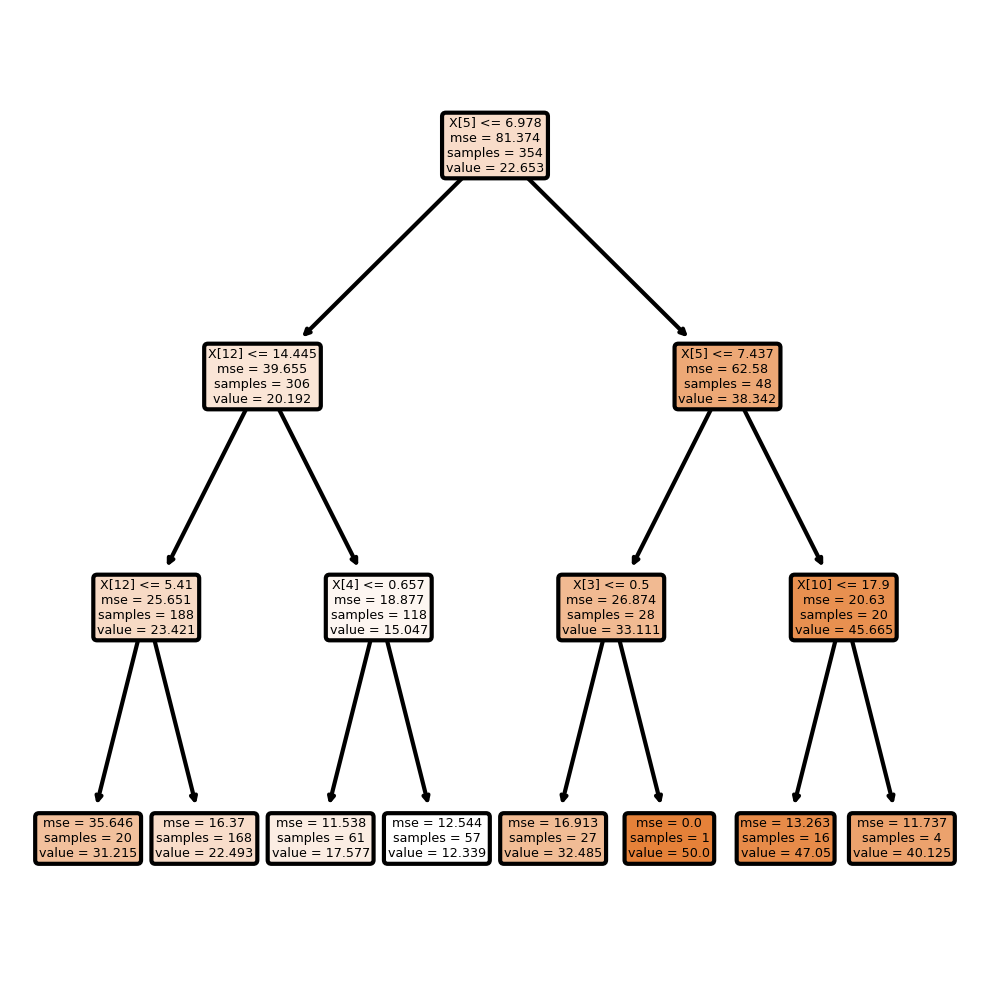

In [33]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(model,filled = True, rounded=True)
plt.show()  

### Loading a dataset for classification

For this demonstration we will use iris data set from sklearn datasets.
This dataset contain information about the petals and the sepals length and width of three species of flowers: iris, setosa and versicolor.

The objective is to predict which species a flower belongs to.

In [7]:
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)

#X, y = load_iris(return_X_y=True)
#print(X.shape)
#print(y.shape)
#np.unique(y)

(569, 30)
(569,)


,Error_metric,Train,Test
0,Accuracy,0.972362,0.941520
1,Precision,0.960938,0.931034
2,Recall,0.995951,0.981818


Confusion matrix for the train set
[[141   1]
 [ 10 246]]


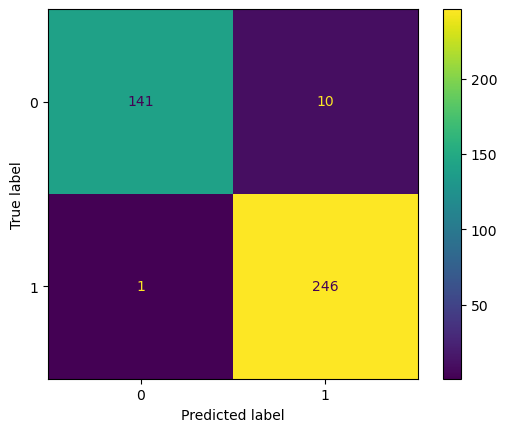



Confusion matrix for the test set
[[ 53   2]
 [  8 108]]


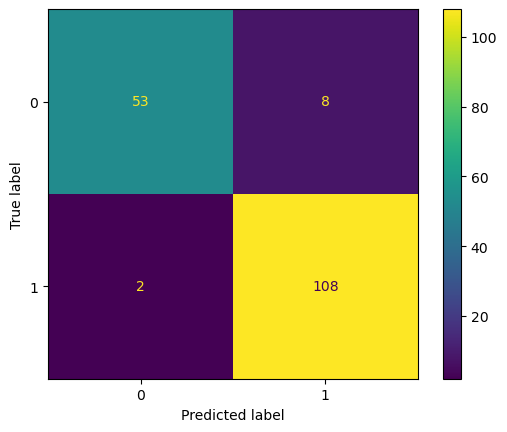

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

#prob_pred_test_dt = model.predict_proba(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

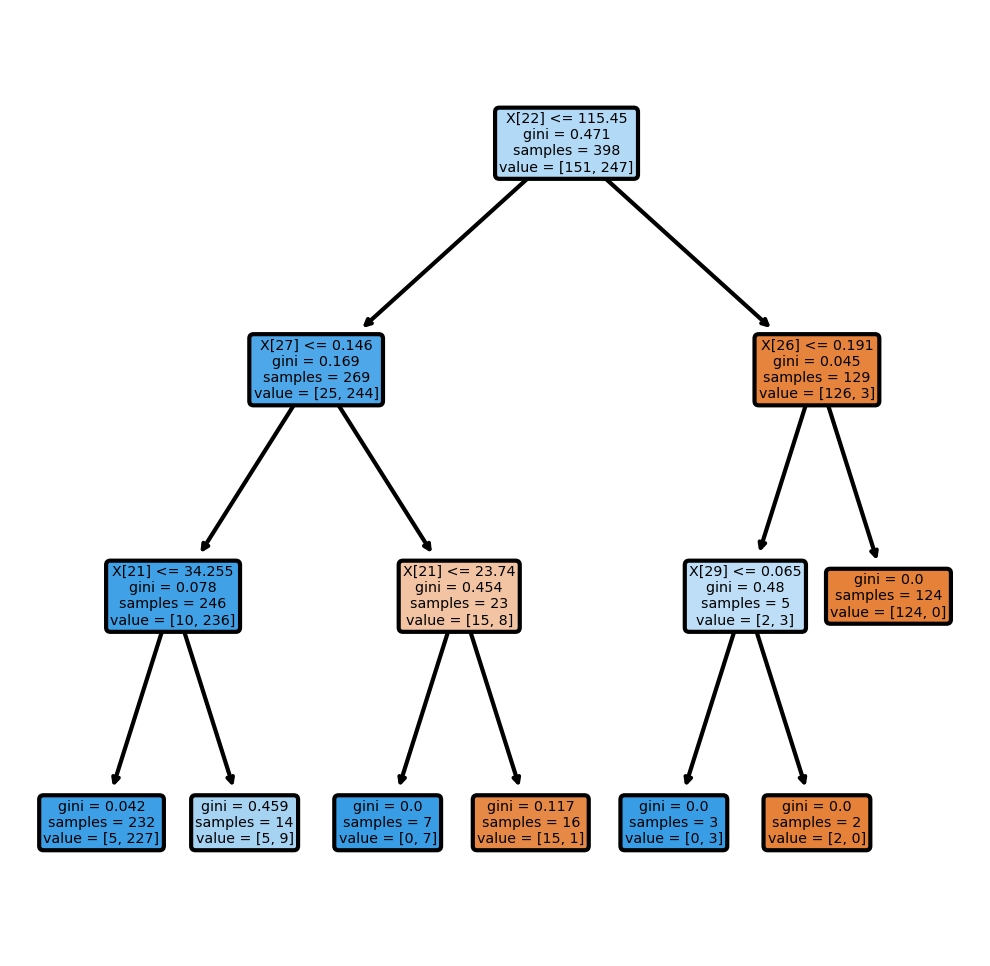

In [19]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dt,filled = True, rounded=True)
plt.show() 

# Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.99,0.96
1,Precision,0.98,0.97
2,Recall,1.00,0.96


Confusion matrix for the train set
[[147   4]
 [  0 247]]


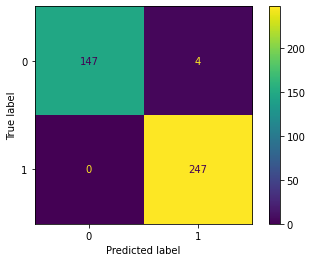



Confusion matrix for the test set
[[ 58   3]
 [  4 106]]


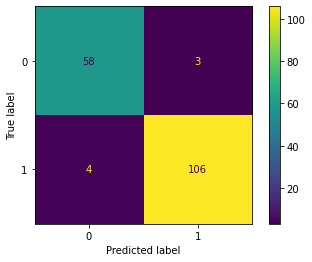

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.k
from sklearn.preprocessing import PowerTransformer

log = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()